In [4]:
from datetime import datetime, timedelta
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt



In [5]:
#quitamos world partner
def quitar_worldp(df):
   dataset= df[df['Partner']=='World'].index
   return df.drop(dataset)


def quitar_worldr(df):
   dataset= df[df['Reporter']=='World'].index
   return df.drop(dataset)

def crear_grafo_di(df):
    return nx.from_pandas_edgelist(df,'Reporter','Partner','Weight',nx.DiGraph())



def numero_lineas(g):
    return g.number_of_edges()
def numero_nodos(g):
    return g.number_of_nodes()

from networkx import NetworkXError

def _reciprocity_iter(G, nodes):
    """Return an iterator of (node, reciprocity)."""
    n = G.nbunch_iter(nodes)
    for node in n:
        pred = set(G.predecessors(node))
        succ = set(G.successors(node))
        overlap = pred & succ
        n_total = len(pred) + len(succ)

        # Reciprocity is not defined for isolated nodes.
        # Return None.
        if n_total == 0:
            yield (node, None)
        else:
            reciprocity = 2.0 * float(len(overlap)) / float(n_total)
            yield (node, reciprocity)


#[docs]
#@not_implemented_for("undirected", "multigraph")
def overall_reciprocity(G):
    """Compute the reciprocity for the whole graph.

    See the doc of reciprocity for the definition.

    Parameters
    ----------
    G : graph
       A networkx graph

    """
    n_all_edge = G.number_of_edges()
    n_overlap_edge = (n_all_edge - G.to_undirected().number_of_edges()) * 2

    if n_all_edge == 0:
        raise NetworkXError("Not defined for empty graphs")

    return float(n_overlap_edge) / float(n_all_edge)

#__all__ = ["reciprocity", "overall_reciprocity"]


def reciprocity(G, nodes=None):
   
    # If `nodes` is not specified, calculate the reciprocity of the graph.
    if nodes is None:
        return overall_reciprocity(G)

    # If `nodes` represents a single node in the graph, return only its
    # reciprocity.
    if nodes in G:
        reciprocity = next(_reciprocity_iter(G, nodes))[1]
        if reciprocity is None:
            raise NetworkXError("Not defined for isolated nodes.")
        else:
            return reciprocity
            # Otherwise, `nodes` represents an iterable of nodes, so return a
    # dictionary mapping node to its reciprocity.
    return dict(_reciprocity_iter(G, nodes))
        





def _directed_weighted_triangles_and_degree_iter(G, nodes=None, weight="weight"):
  
    import numpy as np

    if weight is None or G.number_of_edges() == 0:
        max_weight = 1
    else:
        max_weight = max(d.get(weight, 1) for u, v, d in G.edges(data=True))

    nodes_nbrs = ((n, G._pred[n], G._succ[n]) for n in G.nbunch_iter(nodes))

    def wt(u, v):
        return G[u][v].get(weight, 1) / max_weight

    for i, preds, succs in nodes_nbrs:
        ipreds = set(preds) - {i}
        isuccs = set(succs) - {i}

        directed_triangles = 0
        for j in ipreds:
            jpreds = set(G._pred[j]) - {j}
            jsuccs = set(G._succ[j]) - {j}
            directed_triangles += sum(
                np.cbrt([(wt(j, i) * wt(k, i) * wt(k, j)) for k in ipreds & jpreds])
            )
            directed_triangles += sum(
                np.cbrt([(wt(j, i) * wt(k, i) * wt(j, k)) for k in ipreds & jsuccs])
            )
            directed_triangles += sum(
                np.cbrt([(wt(j, i) * wt(i, k) * wt(k, j)) for k in isuccs & jpreds])
            )
            directed_triangles += sum(
                np.cbrt([(wt(j, i) * wt(i, k) * wt(j, k)) for k in isuccs & jsuccs])
            )

        for j in isuccs:
            jpreds = set(G._pred[j]) - {j}
            jsuccs = set(G._succ[j]) - {j}
            directed_triangles += sum(
                np.cbrt([(wt(i, j) * wt(k, i) * wt(k, j)) for k in ipreds & jpreds])
            )
            directed_triangles += sum(
                np.cbrt([(wt(i, j) * wt(k, i) * wt(j, k)) for k in ipreds & jsuccs])
            )
            directed_triangles += sum(
                np.cbrt([(wt(i, j) * wt(i, k) * wt(k, j)) for k in isuccs & jpreds])
            )
            directed_triangles += sum(
                np.cbrt([(wt(i, j) * wt(i, k) * wt(j, k)) for k in isuccs & jsuccs])
            )

        dtotal = len(ipreds) + len(isuccs)
        dbidirectional = len(ipreds & isuccs)
        yield (i, dtotal, dbidirectional, directed_triangles)

def transitivity(G):
    
    triangles_contri = [
        (t, d * (d - 1)) for v, d, t, _ in _directed_weighted_triangles_and_degree_iter(G)
    ]
    # If the graph is empty
    if len(triangles_contri) == 0:
        return 0
    triangles, contri = map(sum, zip(*triangles_contri))
    return 0 if triangles == 0 else triangles / contri
def density(G):
 
    n = G.number_of_nodes()
    m = G.number_of_edges()
    d = m / (n * (n - 1))
    return d





## Bueeenoo, las variaciones temporales


# FUNCIONES A USAR

In [6]:
# def quitar_worldp(df):
   dataset= df[df['Partner']=='World'].index
   return df.drop(dataset)

dataset_comodidades=[quitar_worldp(i) for i in dataset_comodidades]

def grafo_no(df):
    return nx.from_pandas_edgelist(df,'Reporter','Partner','Weight',nx.Graph())
nodirigido=[grafo_no(i) for i in dataset_comodidades]

IndentationError: unexpected indent (<ipython-input-6-62a7824f1701>, line 2)

IndentationError: unexpected indent (<ipython-input-6-62a7824f1701>, line 2)

In [7]:
def crear_grafo_di(df):
    return nx.from_pandas_edgelist(df,'Reporter','Partner','Weight',nx.DiGraph())

grafos=[crear_grafo_di(i) for i in dataset_comodidades]


def numero_lineas(g):
    return g.number_of_edges()
def numero_nodos(g):
    return g.number_of_nodes()
numero_nodos_totales=[numero_nodos(i) for i in grafos]

numero_linea_dirigdo_di=[numero_lineas(i) for i in grafos]

NameError: name 'dataset_comodidades' is not defined

NameError: name 'dataset_comodidades' is not defined

In [8]:
#ahora la reciprocidad
from networkx import NetworkXError

def _reciprocity_iter(G, nodes):
    """Return an iterator of (node, reciprocity)."""
    n = G.nbunch_iter(nodes)
    for node in n:
        pred = set(G.predecessors(node))
        succ = set(G.successors(node))
        overlap = pred & succ
        n_total = len(pred) + len(succ)

        # Reciprocity is not defined for isolated nodes.
        # Return None.
        if n_total == 0:
            yield (node, None)
        else:
            reciprocity = 2.0 * float(len(overlap)) / float(n_total)
            yield (node, reciprocity)


#[docs]
#@not_implemented_for("undirected", "multigraph")
def overall_reciprocity(G):
    """Compute the reciprocity for the whole graph.

    See the doc of reciprocity for the definition.

    Parameters
    ----------
    G : graph
       A networkx graph

    """
    n_all_edge = G.number_of_edges()
    n_overlap_edge = (n_all_edge - G.to_undirected().number_of_edges()) * 2

    if n_all_edge == 0:
        raise NetworkXError("Not defined for empty graphs")

    return float(n_overlap_edge) / float(n_all_edge)

#__all__ = ["reciprocity", "overall_reciprocity"]


def reciprocity(G, nodes=None):
   
    # If `nodes` is not specified, calculate the reciprocity of the graph.
    if nodes is None:
        return overall_reciprocity(G)

    # If `nodes` represents a single node in the graph, return only its
    # reciprocity.
    if nodes in G:
        reciprocity = next(_reciprocity_iter(G, nodes))[1]
        if reciprocity is None:
            raise NetworkXError("Not defined for isolated nodes.")
        else:
            return reciprocity
        
        


    # Otherwise, `nodes` represents an iterable of nodes, so return a
    # dictionary mapping node to its reciprocity.
    return dict(_reciprocity_iter(G, nodes))

In [61]:
reciprocidad=[reciprocity(i) for i in grafos] #vector de reciprocidad

NameError: name 'grafos' is not defined

NameError: name 'grafos' is not defined

In [10]:
reciprocidad

NameError: name 'reciprocidad' is not defined

NameError: name 'reciprocidad' is not defined

In [11]:
def createList1(n):
    lst = []
    for i in range(n):
        lst.append(i)
    return(lst)
x_1=createList1(40)
print(x_1)

plt.plot(x_1, reciprocidad)
plt.figure(figsize=(8,4))
#plt.axis('off')
plt.show


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


NameError: name 'reciprocidad' is not defined

NameError: name 'reciprocidad' is not defined

In [12]:
plt.figure(figsize = (10, 7))
#plt.plot(horas, meandegree, 'o', linestyle = '-', label = 'Grado medio')
#plt.plot(horas, num_nodes, '*', color = 'r', linestyle = '-', label = 'Nodos en la red')
#plt.plot(horas, num_edges, 'v', color = 'g', linestyle = '-', label = 'Conexiones en la red')
plt.plot(x_1, reciprocidad, '^', color = 'goldenrod', linestyle = '-', label = 'Reciprocidad')
#plt.plot(horas, avg_clustering, 's', color = 'indigo', linestyle = '-', label = 'Clustering medio')
plt.xlabel('Hora', fontsize = 14)
plt.legend()
plt.grid()
plt.plot()

NameError: name 'reciprocidad' is not defined

NameError: name 'reciprocidad' is not defined

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [79]:
#quitamos world partner
def quitar_worldp(df):
   dataset= df[df['Partner']=='World'].index
   return df.drop(dataset)


def quitar_worldr(df):
   dataset= df[df['Reporter']=='World'].index
   return df.drop(dataset)

def crear_grafo_di(df):
    return nx.from_pandas_edgelist(df,'Reporter','Partner','Weight',nx.DiGraph())



def numero_lineas(g):
    return g.number_of_edges()
def numero_nodos(g):
    return g.number_of_nodes()

from networkx import NetworkXError

def _reciprocity_iter(G, nodes):
    """Return an iterator of (node, reciprocity)."""
    n = G.nbunch_iter(nodes)
    for node in n:
        pred = set(G.predecessors(node))
        succ = set(G.successors(node))
        overlap = pred & succ
        n_total = len(pred) + len(succ)

        # Reciprocity is not defined for isolated nodes.
        # Return None.
        if n_total == 0:
            yield (node, None)
        else:
            reciprocity = 2.0 * float(len(overlap)) / float(n_total)
            yield (node, reciprocity)


#[docs]
#@not_implemented_for("undirected", "multigraph")
def overall_reciprocity(G):
    """Compute the reciprocity for the whole graph.

    See the doc of reciprocity for the definition.

    Parameters
    ----------
    G : graph
       A networkx graph

    """
    n_all_edge = G.number_of_edges()
    n_overlap_edge = (n_all_edge - G.to_undirected().number_of_edges()) * 2

    if n_all_edge == 0:
        raise NetworkXError("Not defined for empty graphs")

    return float(n_overlap_edge) / float(n_all_edge)

#__all__ = ["reciprocity", "overall_reciprocity"]


def reciprocity(G, nodes=None):
   
    # If `nodes` is not specified, calculate the reciprocity of the graph.
    if nodes is None:
        return overall_reciprocity(G)

    # If `nodes` represents a single node in the graph, return only its
    # reciprocity.
    if nodes in G:
        reciprocity = next(_reciprocity_iter(G, nodes))[1]
        if reciprocity is None:
            raise NetworkXError("Not defined for isolated nodes.")
        else:
            return reciprocity
            # Otherwise, `nodes` represents an iterable of nodes, so return a
    # dictionary mapping node to its reciprocity.
    return dict(_reciprocity_iter(G, nodes))
        





def _directed_weighted_triangles_and_degree_iter(G, nodes=None, weight="weight"):
  
    import numpy as np

    if weight is None or G.number_of_edges() == 0:
        max_weight = 1
    else:
        max_weight = max(d.get(weight, 1) for u, v, d in G.edges(data=True))

    nodes_nbrs = ((n, G._pred[n], G._succ[n]) for n in G.nbunch_iter(nodes))

    def wt(u, v):
        return G[u][v].get(weight, 1) / max_weight

    for i, preds, succs in nodes_nbrs:
        ipreds = set(preds) - {i}
        isuccs = set(succs) - {i}

        directed_triangles = 0
        for j in ipreds:
            jpreds = set(G._pred[j]) - {j}
            jsuccs = set(G._succ[j]) - {j}
            directed_triangles += sum(
                np.cbrt([(wt(j, i) * wt(k, i) * wt(k, j)) for k in ipreds & jpreds])
            )
            directed_triangles += sum(
                np.cbrt([(wt(j, i) * wt(k, i) * wt(j, k)) for k in ipreds & jsuccs])
            )
            directed_triangles += sum(
                np.cbrt([(wt(j, i) * wt(i, k) * wt(k, j)) for k in isuccs & jpreds])
            )
            directed_triangles += sum(
                np.cbrt([(wt(j, i) * wt(i, k) * wt(j, k)) for k in isuccs & jsuccs])
            )

        for j in isuccs:
            jpreds = set(G._pred[j]) - {j}
            jsuccs = set(G._succ[j]) - {j}
            directed_triangles += sum(
                np.cbrt([(wt(i, j) * wt(k, i) * wt(k, j)) for k in ipreds & jpreds])
            )
            directed_triangles += sum(
                np.cbrt([(wt(i, j) * wt(k, i) * wt(j, k)) for k in ipreds & jsuccs])
            )
            directed_triangles += sum(
                np.cbrt([(wt(i, j) * wt(i, k) * wt(k, j)) for k in isuccs & jpreds])
            )
            directed_triangles += sum(
                np.cbrt([(wt(i, j) * wt(i, k) * wt(j, k)) for k in isuccs & jsuccs])
            )

        dtotal = len(ipreds) + len(isuccs)
        dbidirectional = len(ipreds & isuccs)
        yield (i, dtotal, dbidirectional, directed_triangles)

def transitivity(G):
    
    triangles_contri = [
        (t, d * (d - 1)) for v, d, t, _ in _directed_weighted_triangles_and_degree_iter(G)
    ]
    # If the graph is empty
    if len(triangles_contri) == 0:
        return 0
    triangles, contri = map(sum, zip(*triangles_contri))
    return 0 if triangles == 0 else triangles / contri
def density(G):
 
    n = G.number_of_nodes()
    m = G.number_of_edges()
    d = m / (n * (n - 1))
    return d





totales

In [14]:
plt.figure(figsize = (10, 7))
#plt.plot(horas, meandegree, 'o', linestyle = '-', label = 'Grado medio')
#plt.plot(horas, num_nodes, '*', color = 'r', linestyle = '-', label = 'Nodos en la red')
#plt.plot(horas, num_edges, 'v', color = 'g', linestyle = '-', label = 'Conexiones en la red')
plt.plot(x_1, reciprocidad_totales, '^', color = 'goldenrod', linestyle = '-', label = 'Reciprocidad')
#plt.plot(horas, avg_clustering, 's', color = 'indigo', linestyle = '-', label = 'Clustering medio')
plt.xlabel('Meses', fontsize = 14)
plt.legend()
plt.grid()
plt.plot()

NameError: name 'reciprocidad_totales' is not defined

NameError: name 'reciprocidad_totales' is not defined

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [62]:
r0_totales = pd.read_csv('Enero2018totales.csv',sep=',',encoding='utf-8')
r1_totales = pd.read_csv('feb2018totales.csv',sep=',',encoding='utf-8')
r2_totales = pd.read_csv('marzo2018totales.csv',sep=',',encoding='utf-8')
r3_totales = pd.read_csv('abril2018totales.csv',sep=',',encoding='utf-8')
r4_totales = pd.read_csv('mayo2018totales.csv',sep=',',encoding='utf-8')
r5_totales = pd.read_csv('junio2018totales.csv',sep=',',encoding='utf-8')
r6_totales = pd.read_csv('julio2018totales.csv',sep=',',encoding='utf-8')
r7_totales = pd.read_csv('agosto2018totales.csv',sep=',',encoding='utf-8')
r8_totales = pd.read_csv('sep2018totales.csv',sep=',',encoding='utf-8')
r9_totales = pd.read_csv('oct2018totales.csv',sep=',',encoding='utf-8')
r10_totales = pd.read_csv('nov2018totales.csv',sep=',',encoding='utf-8')
r11_totales = pd.read_csv('dic2018totales.csv',sep=',',encoding='utf-8')
r12_totales=pd.read_csv('Enero2019totales.csv',sep=',',encoding='utf-8')
r13_totales = pd.read_csv('febrero2019totales.csv',sep=',',encoding='utf-8')
r14_totales = pd.read_csv('marzo2019totales.csv',sep=',',encoding='utf-8')
r15_totales = pd.read_csv('abril2019totales.csv',sep=',',encoding='utf-8')
r16_totales = pd.read_csv('mayo2019totales.csv',sep=',',encoding='utf-8')
r17_totales = pd.read_csv('junio2019totales.csv',sep=',',encoding='utf-8')
r18_totales = pd.read_csv('julio2019totales.csv',sep=',',encoding='utf-8')
r19_totales = pd.read_csv('agosto2019totales.csv',sep=',',encoding='utf-8')
r20_totales = pd.read_csv('sep2019totales.csv',sep=',',encoding='utf-8')
r21_totales = pd.read_csv('oct2019totales.csv',sep=',',encoding='utf-8')
r22_totales = pd.read_csv('nov2019totales.csv',sep=',',encoding='utf-8')
r23_totales = pd.read_csv('dic2019totales.csv',sep=',',encoding='utf-8')
r24_totales=pd.read_csv('Enero2020totales.csv',sep=',',encoding='utf-8')
r25_totales = pd.read_csv('feb2020totales.csv',sep=',',encoding='utf-8')
r26_totales = pd.read_csv('marzo2020totales.csv',sep=',',encoding='utf-8')
r27_totales = pd.read_csv('abril2020totales.csv',sep=',',encoding='utf-8')
r28_totales = pd.read_csv('mayo2020totales.csv',sep=',',encoding='utf-8')
r29_totales = pd.read_csv('junio2020totales.csv',sep=',',encoding='utf-8')
r30_totales = pd.read_csv('julio2020totales.csv',sep=',',encoding='utf-8')
r31_totales = pd.read_csv('agosto2020totales.csv',sep=',',encoding='utf-8')
r32_totales = pd.read_csv('sep2020totales.csv',sep=',',encoding='utf-8')
r33_totales = pd.read_csv('oct2020totales.csv',sep=',',encoding='utf-8')
r34_totales = pd.read_csv('nov2020totales.csv',sep=',',encoding='utf-8')
r35_totales = pd.read_csv('dic2020totales.csv',sep=',',encoding='utf-8')
r36_totales=pd.read_csv('Enero2021totales.csv',sep=',',encoding='utf-8')
r37_totales = pd.read_csv('Febrero2021totales.csv',sep=',',encoding='utf-8')
r38_totales = pd.read_csv('marzo2021totales.csv',sep=',',encoding='utf-8')
r39_totales = pd.read_csv('abril2021totales.csv',sep=',',encoding='utf-8')

FileNotFoundError: [Errno 2] No such file or directory: 'Enero2018totales.csv'

FileNotFoundError: [Errno 2] No such file or directory: 'Enero2018totales.csv'

In [16]:
r0_junto = pd.read_csv('Enero2018junto.csv',sep=',',encoding='utf-8')
r1_junto = pd.read_csv('feb2018junto.csv',sep=',',encoding='utf-8')
r2_junto = pd.read_csv('marzo2018junto.csv',sep=',',encoding='utf-8')
r3_junto = pd.read_csv('abril2018junto.csv',sep=',',encoding='utf-8')
r4_junto = pd.read_csv('mayo2018junto.csv',sep=',',encoding='utf-8')
r5_junto = pd.read_csv('junio2018junto.csv',sep=',',encoding='utf-8')
r6_junto = pd.read_csv('julio2018junto.csv',sep=',',encoding='utf-8')
r7_junto = pd.read_csv('agosto2018junto.csv',sep=',',encoding='utf-8')
r8_junto = pd.read_csv('sep2018junto.csv',sep=',',encoding='utf-8')
r9_junto = pd.read_csv('oct2018junto.csv',sep=',',encoding='utf-8')
r10_junto = pd.read_csv('nov2018junto.csv',sep=',',encoding='utf-8')
r11_junto = pd.read_csv('dic2018junto.csv',sep=',',encoding='utf-8')
r12_junto=pd.read_csv('Enero2019junto.csv',sep=',',encoding='utf-8')
r13_junto = pd.read_csv('febrero2019junto.csv',sep=',',encoding='utf-8')
r14_junto = pd.read_csv('marzo2019junto.csv',sep=',',encoding='utf-8')
r15_junto = pd.read_csv('abril2019junto.csv',sep=',',encoding='utf-8')
r16_junto = pd.read_csv('mayo2019junto.csv',sep=',',encoding='utf-8')
r17_junto = pd.read_csv('junio2019junto.csv',sep=',',encoding='utf-8')
r18_junto = pd.read_csv('julio2019junto.csv',sep=',',encoding='utf-8')
r19_junto = pd.read_csv('agosto2019junto.csv',sep=',',encoding='utf-8')
r20_junto = pd.read_csv('sep2019junto.csv',sep=',',encoding='utf-8')
r21_junto = pd.read_csv('oct2019junto.csv',sep=',',encoding='utf-8')
r22_junto = pd.read_csv('nov2019junto.csv',sep=',',encoding='utf-8')
r23_junto = pd.read_csv('dic2019junto.csv',sep=',',encoding='utf-8')
r24_junto=pd.read_csv('Enero2020junto.csv',sep=',',encoding='utf-8')
r25_junto = pd.read_csv('feb2020junto.csv',sep=',',encoding='utf-8')
r26_junto = pd.read_csv('marzo2020junto.csv',sep=',',encoding='utf-8')
r27_junto = pd.read_csv('abril2020junto.csv',sep=',',encoding='utf-8')
r28_junto = pd.read_csv('mayo2020junto.csv',sep=',',encoding='utf-8')
r29_junto = pd.read_csv('junio2020junto.csv',sep=',',encoding='utf-8')
r30_junto = pd.read_csv('julio2020junto.csv',sep=',',encoding='utf-8')
r31_junto = pd.read_csv('agosto2020junto.csv',sep=',',encoding='utf-8')
r32_junto = pd.read_csv('sep2020junto.csv',sep=',',encoding='utf-8')
r33_junto = pd.read_csv('oct2020junto.csv',sep=',',encoding='utf-8')
r34_junto = pd.read_csv('nov2020junto.csv',sep=',',encoding='utf-8')
r35_junto = pd.read_csv('dic2020junto.csv',sep=',',encoding='utf-8')
r36_junto=pd.read_csv('Enero2021junto.csv',sep=',',encoding='utf-8')
r37_junto = pd.read_csv('Febrero2021junto.csv',sep=',',encoding='utf-8')
r38_junto = pd.read_csv('marzo2021junto.csv',sep=',',encoding='utf-8')
r39_junto = pd.read_csv('abril2021junto.csv',sep=',',encoding='utf-8')

In [63]:
dataset_comodidades_junto=[r0_junto,r1_junto,r2_junto,r3_junto,r4_junto,r5_junto,r6_junto,r7_junto,r8_junto,r9_junto,r10_junto,r11_junto,r12_junto,r13_junto,r14_junto,r15_junto,r16_junto,r17_junto,r18_junto,r19_junto,r20_junto,r21_junto,r22_junto,r23_junto,r24_junto,r25_junto,r26_junto,r27_junto,r28_junto,r29_junto,r30_junto,r31_junto,r32_junto,r33_junto,r34_junto,r35_junto,r36_junto,r37_junto,r38_junto,r39_junto]


dataset_comodidades_junto=[quitar_worldp(i) for i in dataset_comodidades_junto]
dataset_comodidades_junto=[quitar_worldr(i) for i in dataset_comodidades_junto]

In [19]:
dataset_comodidades_junto=[r0_junto,r1_junto,r2_junto,r3_junto,r4_junto,r5_junto,r6_junto,r7_junto,r8_junto,r9_junto,r10_junto,r11_junto,r12_junto,r13_junto,r14_junto,r15_junto,r16_junto,r17_junto,r18_junto,r19_junto,r20_junto,r21_junto,r22_junto,r23_junto,r24_junto,r25_junto,r26_junto,r27_junto,r28_junto,r29_junto,r30_junto,r31_junto,r32_junto,r33_junto,r34_junto,r35_junto,r36_junto,r37_junto,r38_junto,r39_junto]


dataset_comodidades_junto=[quitar_worldp(i) for i in dataset_comodidades_junto]
dataset_comodidades_junto=[quitar_worldr(i) for i in dataset_comodidades_junto]

In [67]:
grafos_junto=[crear_grafo_di(i) for i in dataset_comodidades_junto]
numero_nodos_junto=[numero_nodos(i) for i in grafos_junto]


reciprocidad_junto=[reciprocity(i) for i in grafos_junto] #vector de reciprocidad



densidad_junto=[density(i) for i in grafos_junto]
#transitividad_junto=[transitivity(i) for i in grafos_junto]


In [68]:
def createList1(n):
    lst = []
    for i in range(n):
        lst.append(i)
    return(lst)
x_1=createList1(40)
print(x_1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


[]

[]

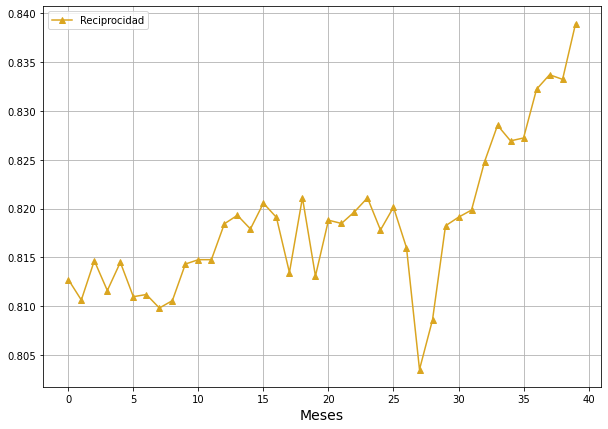

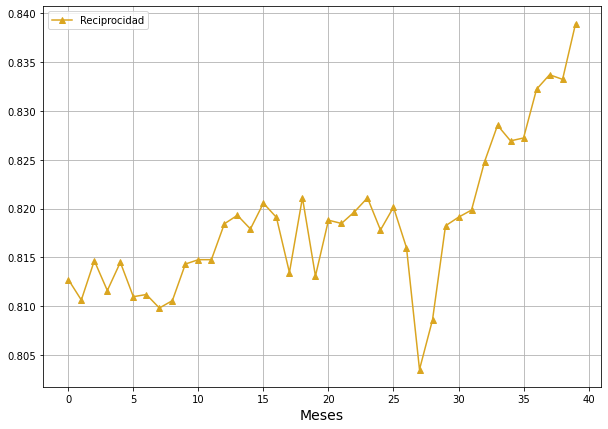

In [69]:
plt.figure(figsize = (10, 7))
#plt.plot(horas, meandegree, 'o', linestyle = '-', label = 'Grado medio')
#plt.plot(horas, num_nodes, '*', color = 'r', linestyle = '-', label = 'Nodos en la red')
#plt.plot(horas, num_edges, 'v', color = 'g', linestyle = '-', label = 'Conexiones en la red')
plt.plot(x_1, reciprocidad_junto, '^', color = 'goldenrod', linestyle = '-', label = 'Reciprocidad')
#plt.plot(horas, avg_clustering, 's', color = 'indigo', linestyle = '-', label = 'Clustering medio')
plt.xlabel('Meses', fontsize = 14)
plt.legend()
plt.grid()
plt.plot()

[]

[]

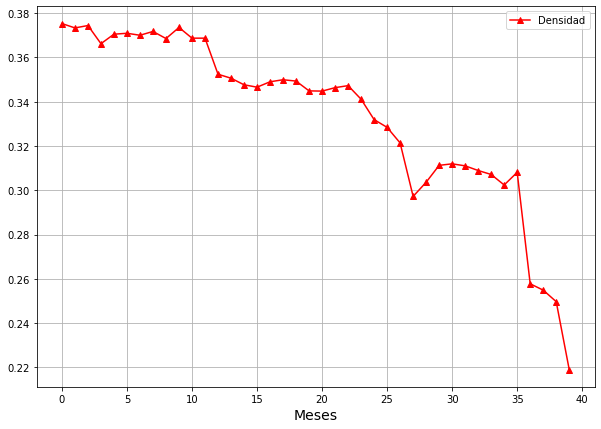

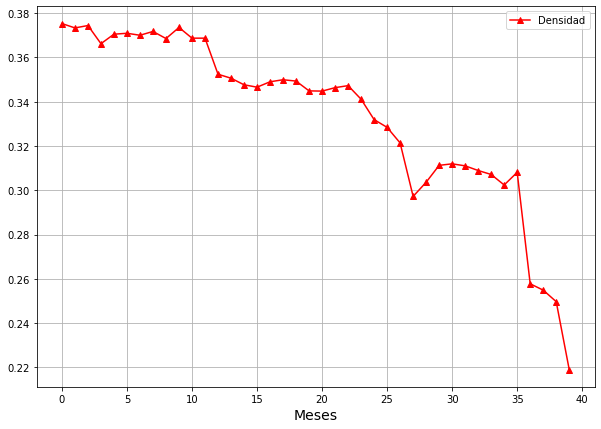

In [70]:
plt.figure(figsize = (10, 7))
#plt.plot(horas, meandegree, 'o', linestyle = '-', label = 'Grado medio')
#plt.plot(horas, num_nodes, '*', color = 'r', linestyle = '-', label = 'Nodos en la red')
#plt.plot(horas, num_edges, 'v', color = 'g', linestyle = '-', label = 'Conexiones en la red')
plt.plot(x_1, densidad_junto, '^', color = 'r', linestyle = '-', label = 'Densidad')
#plt.plot(horas, avg_clustering, 's', color = 'indigo', linestyle = '-', label = 'Clustering medio')
plt.xlabel('Meses', fontsize = 14)
plt.legend()
plt.grid()
plt.plot()

[]

[]

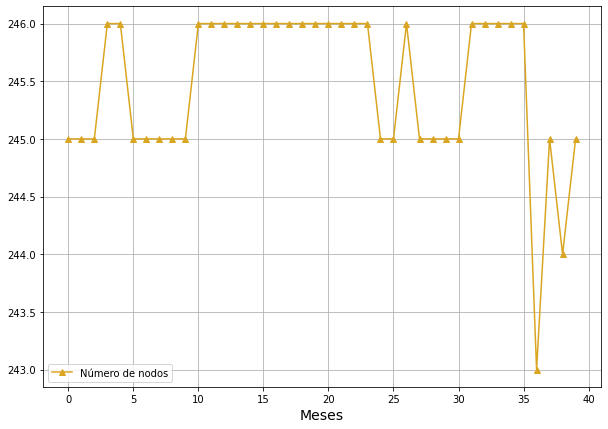

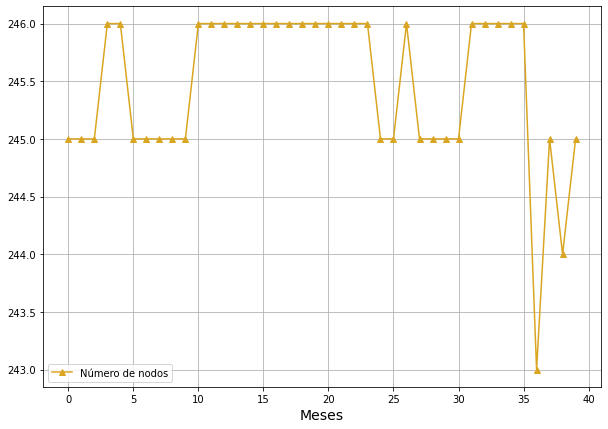

In [71]:
plt.figure(figsize = (10, 7))
#plt.plot(horas, meandegree, 'o', linestyle = '-', label = 'Grado medio')
#plt.plot(horas, num_nodes, '*', color = 'r', linestyle = '-', label = 'Nodos en la red')
#plt.plot(horas, num_edges, 'v', color = 'g', linestyle = '-', label = 'Conexiones en la red')
plt.plot(x_1, numero_nodos_junto, '^', color = 'goldenrod', linestyle = '-', label = 'Número de nodos')
#plt.plot(horas, avg_clustering, 's', color = 'indigo', linestyle = '-', label = 'Clustering medio')
plt.xlabel('Meses', fontsize = 14)
plt.legend()
plt.grid()
plt.plot()

In [29]:
transitividad_junto

NameError: name 'transitividad_junto' is not defined

NameError: name 'transitividad_junto' is not defined

In [27]:
plt.figure(figsize = (10, 7))
#plt.plot(horas, meandegree, 'o', linestyle = '-', label = 'Grado medio')
#plt.plot(horas, num_nodes, '*', color = 'r', linestyle = '-', label = 'Nodos en la red')
#plt.plot(horas, num_edges, 'v', color = 'g', linestyle = '-', label = 'Conexiones en la red')
plt.plot(x_1, transitividad_junto, '^', color = 'goldenrod', linestyle = '-', label = 'Transitividad')
#plt.plot(horas, avg_clustering, 's', color = 'indigo', linestyle = '-', label = 'Clustering medio')
plt.xlabel('Meses', fontsize = 14)
plt.legend()
plt.grid()
plt.plot()

NameError: name 'transitividad_junto' is not defined

NameError: name 'transitividad_junto' is not defined

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [30]:
transitividad_junto=[transitivity(i) for i in grafos_junto]


KeyboardInterrupt: 

KeyboardInterrupt: 

# textiles

In [72]:
r0_textiles = pd.read_csv('2018enerotextiles.csv',sep=',',encoding='utf-8')
r1_textiles = pd.read_csv('2018febtextiles.csv',sep=',',encoding='utf-8')
r2_textiles = pd.read_csv('2018marzotextiles.csv',sep=',',encoding='utf-8')
r3_textiles = pd.read_csv('2018abriltextiles.csv',sep=',',encoding='utf-8')
r4_textiles = pd.read_csv('2018mayoextiles.csv',sep=',',encoding='utf-8')
r5_textiles = pd.read_csv('2018juniotextiles.csv',sep=',',encoding='utf-8')
r6_textiles = pd.read_csv('2018juliotextiles.csv',sep=',',encoding='utf-8')
r7_textiles = pd.read_csv('2018agostotextiles.csv',sep=',',encoding='utf-8')
r8_textiles = pd.read_csv('2018septextiles.csv',sep=',',encoding='utf-8')
r9_textiles = pd.read_csv('2018octtextiles.csv',sep=',',encoding='utf-8')
r10_textiles = pd.read_csv('2018nov11textiles.csv',sep=',',encoding='utf-8')
r11_textiles = pd.read_csv('2018dictextiles.csv',sep=',',encoding='utf-8')
r12_textiles=pd.read_csv('2019enerotextiles',sep=',',encoding='utf-8')
r13_textiles = pd.read_csv('2019febrerotextiles.csv',sep=',',encoding='utf-8')
r14_textiles = pd.read_csv('2019marzotextiles.csv',sep=',',encoding='utf-8')
r15_textiles = pd.read_csv('2019abriltextiles.csv',sep=',',encoding='utf-8')
r16_textiles = pd.read_csv('2019mayotextiles.csv',sep=',',encoding='utf-8')
r17_textiles = pd.read_csv('2019juniotextiles.csv',sep=',',encoding='utf-8')
r18_textiles = pd.read_csv('2019juliotextiles.csv',sep=',',encoding='utf-8')
r19_textiles = pd.read_csv('2019agostotextiles.csv',sep=',',encoding='utf-8')
r20_textiles = pd.read_csv('2019septextiles.csv',sep=',',encoding='utf-8')
r21_textiles = pd.read_csv('2019octtextiles.csv',sep=',',encoding='utf-8')
r22_textiles = pd.read_csv('2019nov11textiles.csv',sep=',',encoding='utf-8')
r23_textiles = pd.read_csv('2019dictextiles.csv',sep=',',encoding='utf-8')
r24_textiles=pd.read_csv('2020enerotextiles.csv',sep=',',encoding='utf-8')
r25_textiles = pd.read_csv('2020febtextiles.csv',sep=',',encoding='utf-8')
r26_textiles = pd.read_csv('2020marzotextiles.csv',sep=',',encoding='utf-8')
r27_textiles = pd.read_csv('2020abriltextiles.csv',sep=',',encoding='utf-8')
r28_textiles = pd.read_csv('2020mayotextiles.csv',sep=',',encoding='utf-8')
r29_textiles = pd.read_csv('2020juniotextiles.csv',sep=',',encoding='utf-8')
r30_textiles = pd.read_csv('2020juliotextiles.csv',sep=',',encoding='utf-8')
r31_textiles = pd.read_csv('2020agostotextiles.csv',sep=',',encoding='utf-8')
r32_textiles = pd.read_csv('2020septextiles.csv',sep=',',encoding='utf-8')
r33_textiles = pd.read_csv('2020octtextiles.csv',sep=',',encoding='utf-8')
r34_textiles = pd.read_csv('2020novtextiles.csv',sep=',',encoding='utf-8')
r35_textiles = pd.read_csv('2020dictextiles.csv',sep=',',encoding='utf-8')
r36_textiles=pd.read_csv('2021enerotextiles.csv',sep=',',encoding='utf-8')
r37_textiles = pd.read_csv('2021febrerotextiles.csv',sep=',',encoding='utf-8')
r38_textiles = pd.read_csv('2021marzotextiles.csv',sep=',',encoding='utf-8')
r39_textiles = pd.read_csv('2021abritextiles.csv',sep=',',encoding='utf-8')

FileNotFoundError: [Errno 2] No such file or directory: '2018mayoextiles.csv'

FileNotFoundError: [Errno 2] No such file or directory: '2018mayoextiles.csv'

In [49]:
r0_textiles = pd.read_csv('2018enerotextiles.csv',sep=',',encoding='utf-8')
r1_textiles = pd.read_csv('2018febtextiles.csv',sep=',',encoding='utf-8')
r2_textiles = pd.read_csv('2018marzotextiles.csv',sep=',',encoding='utf-8')
r3_textiles = pd.read_csv('2018abriltextiles.csv',sep=',',encoding='utf-8')
r4_textiles = pd.read_csv('2018mayotextiles.csv',sep=',',encoding='utf-8')
r5_textiles = pd.read_csv('2018juniotextiles.csv',sep=',',encoding='utf-8')
r6_textiles = pd.read_csv('2018juliotextiles.csv',sep=',',encoding='utf-8')
r7_textiles = pd.read_csv('2018agostotextiles.csv',sep=',',encoding='utf-8')
r8_textiles = pd.read_csv('2018septextiles.csv',sep=',',encoding='utf-8')
r9_textiles = pd.read_csv('2018octtextiles.csv',sep=',',encoding='utf-8')
r10_textiles = pd.read_csv('2018nov11textiles.csv',sep=',',encoding='utf-8')
r11_textiles = pd.read_csv('2018dictextiles.csv',sep=',',encoding='utf-8')
r12_textiles=pd.read_csv('2019enerotextiles.csv',sep=',',encoding='utf-8')
r13_textiles = pd.read_csv('2019febrerotextiles.csv',sep=',',encoding='utf-8')
r14_textiles = pd.read_csv('2019marzotextiles.csv',sep=',',encoding='utf-8')
r15_textiles = pd.read_csv('2019abriltextiles.csv',sep=',',encoding='utf-8')
r16_textiles = pd.read_csv('2019mayotextiles.csv',sep=',',encoding='utf-8')
r17_textiles = pd.read_csv('2019juniotextiles.csv',sep=',',encoding='utf-8')
r18_textiles = pd.read_csv('2019juliotextiles.csv',sep=',',encoding='utf-8')
r19_textiles = pd.read_csv('2019agostotextiles.csv',sep=',',encoding='utf-8')
r20_textiles = pd.read_csv('2019septextiles.csv',sep=',',encoding='utf-8')
r21_textiles = pd.read_csv('2019octubretextiles.csv',sep=',',encoding='utf-8')
r22_textiles = pd.read_csv('2019novtextiles.csv',sep=',',encoding='utf-8')
r23_textiles = pd.read_csv('2019dictextiles.csv',sep=',',encoding='utf-8')
r24_textiles=pd.read_csv('2020enerotextiles.csv',sep=',',encoding='utf-8')
r25_textiles = pd.read_csv('2020febrerotextiles.csv',sep=',',encoding='utf-8')
r26_textiles = pd.read_csv('2020marzotextiles.csv',sep=',',encoding='utf-8')
r27_textiles = pd.read_csv('2020abriltextiles.csv',sep=',',encoding='utf-8')
r28_textiles = pd.read_csv('2020mayotextiles.csv',sep=',',encoding='utf-8')
r29_textiles = pd.read_csv('2020juniotextiles.csv',sep=',',encoding='utf-8')
r30_textiles = pd.read_csv('2020juliotextiles.csv',sep=',',encoding='utf-8')
r31_textiles = pd.read_csv('2020agostotextiles.csv',sep=',',encoding='utf-8')
r32_textiles = pd.read_csv('2020septiembretextiles.csv',sep=',',encoding='utf-8')
r33_textiles = pd.read_csv('2020octubretextiles.csv',sep=',',encoding='utf-8')
r34_textiles = pd.read_csv('2020noviembretextiles.csv',sep=',',encoding='utf-8')
r35_textiles = pd.read_csv('2020diciembretextiles.csv',sep=',',encoding='utf-8')
r36_textiles=pd.read_csv('2021enerotextiles.csv',sep=',',encoding='utf-8')
r37_textiles = pd.read_csv('2021febtextiles.csv',sep=',',encoding='utf-8')
r38_textiles = pd.read_csv('2021marzotextiles.csv',sep=',',encoding='utf-8')
r39_textiles = pd.read_csv('2021abriltextiles.csv',sep=',',encoding='utf-8')

In [73]:
dataset_comodidades_textiles=[r0_textiles,r1_textiles,r2_textiles,r3_textiles,r4_textiles,r5_textiles,r6_textiles,r7_textiles,r8_textiles,r9_textiles,r10_textiles,r11_textiles,r12_textiles,r13_textiles,r14_textiles,r15_textiles,r16_textiles,r17_textiles,r18_textiles,r19_textiles,r20_textiles,r21_textiles,r22_textiles,r23_textiles,r24_textiles,r25_textiles,r26_textiles,r27_textiles,r28_textiles,r29_textiles,r30_textiles,r31_textiles,r32_textiles,r33_textiles,r34_textiles,r35_textiles,r36_textiles,r37_textiles,r38_textiles,r39_textiles]

In [75]:
dataset_comodidades_textiles=[quitar_worldp(i) for i in dataset_comodidades_textiles]
dataset_comodidades_textiles=[quitar_worldr(i) for i in dataset_comodidades_textiles]

KeyboardInterrupt: 

KeyboardInterrupt: 

In [80]:
grafos_textiles=[crear_grafo_di(i) for i in dataset_comodidades_textiles]
#numero_nodos_textiles=[numero_nodos(i) for i in grafos_textiles]


In [81]:
numero_nodos_textiles=[numero_nodos(i) for i in grafos_textiles]


reciprocidad_textiles=[reciprocity(i) for i in grafos_textiles] #vector de reciprocidad



densidad_textiles=[density(i) for i in grafos_textiles]

[]

[]

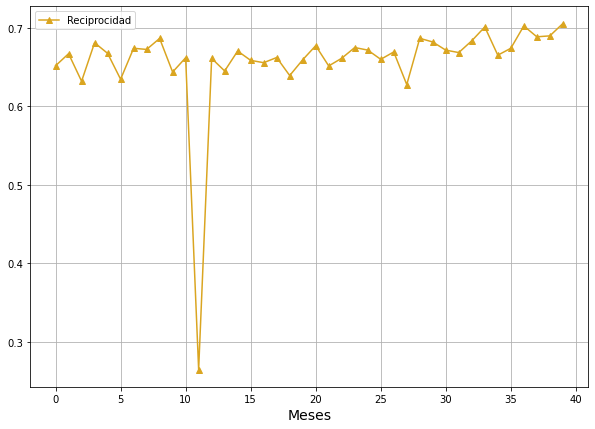

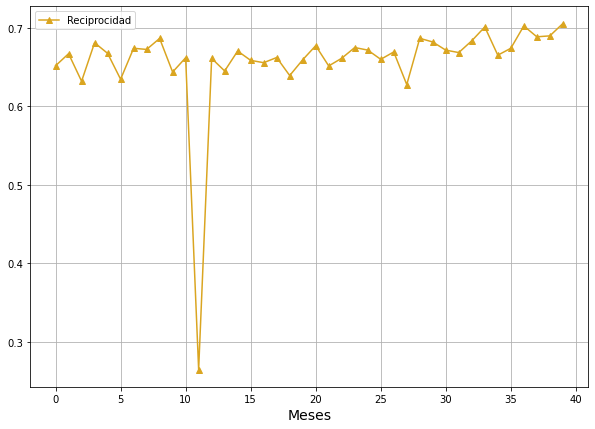

In [82]:
plt.figure(figsize = (10, 7))
#plt.plot(horas, meandegree, 'o', linestyle = '-', label = 'Grado medio')
#plt.plot(horas, num_nodes, '*', color = 'r', linestyle = '-', label = 'Nodos en la red')
#plt.plot(horas, num_edges, 'v', color = 'g', linestyle = '-', label = 'Conexiones en la red')
plt.plot(x_1, reciprocidad_textiles, '^', color = 'goldenrod', linestyle = '-', label = 'Reciprocidad')
#plt.plot(horas, avg_clustering, 's', color = 'indigo', linestyle = '-', label = 'Clustering medio')
plt.xlabel('Meses', fontsize = 14)
plt.legend()
plt.grid()
plt.plot()

[]

[]

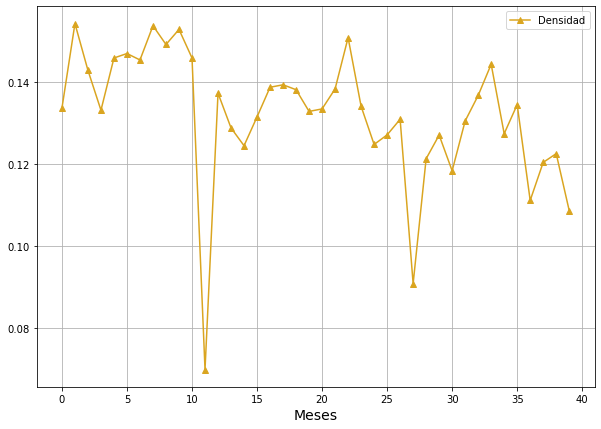

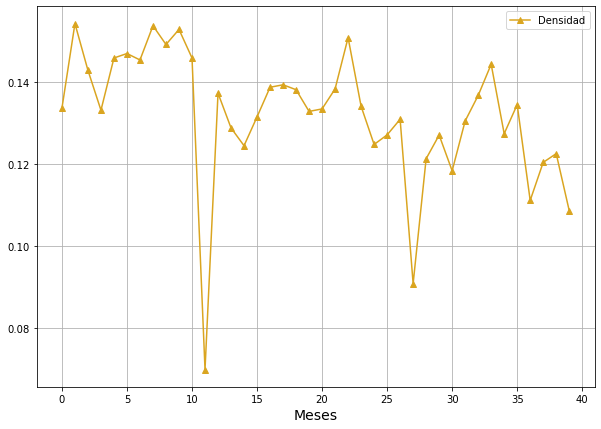

In [83]:
plt.figure(figsize = (10, 7))
#plt.plot(horas, meandegree, 'o', linestyle = '-', label = 'Grado medio')
#plt.plot(horas, num_nodes, '*', color = 'r', linestyle = '-', label = 'Nodos en la red')
#plt.plot(horas, num_edges, 'v', color = 'g', linestyle = '-', label = 'Conexiones en la red')
plt.plot(x_1, densidad_textiles, '^', color = 'goldenrod', linestyle = '-', label = 'Densidad')
#plt.plot(horas, avg_clustering, 's', color = 'indigo', linestyle = '-', label = 'Clustering medio')
plt.xlabel('Meses', fontsize = 14)
plt.legend()
plt.grid()
plt.plot()

[]

[]

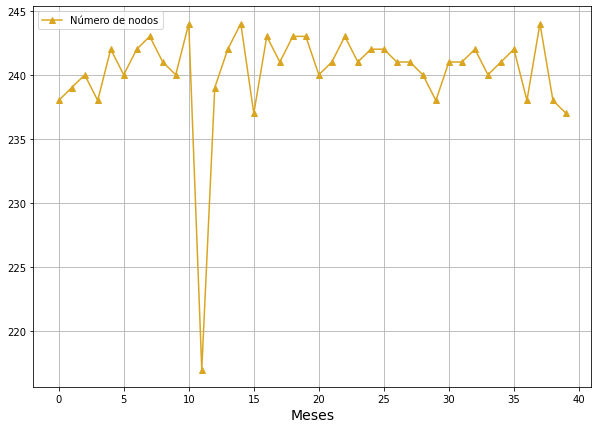

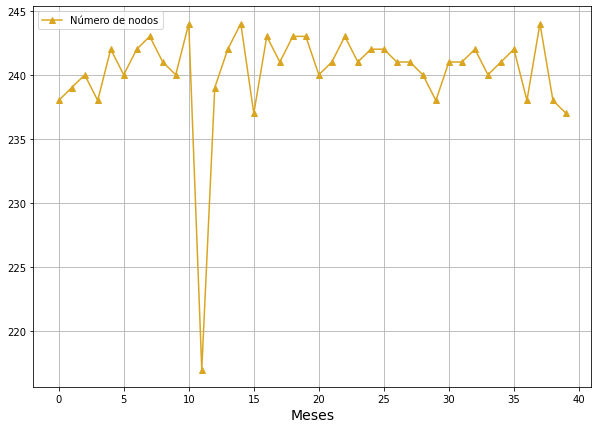

In [84]:
plt.figure(figsize = (10, 7))
#plt.plot(horas, meandegree, 'o', linestyle = '-', label = 'Grado medio')
#plt.plot(horas, num_nodes, '*', color = 'r', linestyle = '-', label = 'Nodos en la red')
#plt.plot(horas, num_edges, 'v', color = 'g', linestyle = '-', label = 'Conexiones en la red')
plt.plot(x_1, numero_nodos_textiles, '^', color = 'goldenrod', linestyle = '-', label = 'Número de nodos')
#plt.plot(x_1, numero_nodos_totales, 's', color = 'indigo', linestyle = '-', label = 'Clustering medio')
plt.xlabel('Meses', fontsize = 14)
plt.legend()
plt.grid()
plt.plot()


# materia

In [88]:
r0_materia = pd.read_csv('2018eneromateria.csv',sep=',',encoding='utf-8')
r1_materia = pd.read_csv('2018febmateria.csv',sep=',',encoding='utf-8')
r2_materia = pd.read_csv('2018marzomateria.csv',sep=',',encoding='utf-8')
r3_materia = pd.read_csv('2018abrilmateria.csv',sep=',',encoding='utf-8')
r4_materia = pd.read_csv('2018mayomateria.csv',sep=',',encoding='utf-8')
r5_materia = pd.read_csv('2018juniomateria.csv',sep=',',encoding='utf-8')
r6_materia = pd.read_csv('2018juliomateria.csv',sep=',',encoding='utf-8')
r7_materia = pd.read_csv('2018agostomateria.csv',sep=',',encoding='utf-8')
r8_materia = pd.read_csv('2018sepmateria.csv',sep=',',encoding='utf-8')
r9_materia = pd.read_csv('2018octmateria.csv',sep=',',encoding='utf-8')
r10_materia = pd.read_csv('2018nov11materia.csv',sep=',',encoding='utf-8')
r11_materia = pd.read_csv('2018dicmateria.csv',sep=',',encoding='utf-8')
r12_materia=pd.read_csv('2019Eneromateria.csv',sep=',',encoding='utf-8')
r13_materia = pd.read_csv('2019febreromateria.csv',sep=',',encoding='utf-8')
r14_materia = pd.read_csv('2019marzomateria.csv',sep=',',encoding='utf-8')
r15_materia = pd.read_csv('2019abrilmateria.csv',sep=',',encoding='utf-8')
r16_materia = pd.read_csv('2019mayomateria.csv',sep=',',encoding='utf-8')
r17_materia = pd.read_csv('2019juniomateria.csv',sep=',',encoding='utf-8')
r18_materia = pd.read_csv('2019juliomateria.csv',sep=',',encoding='utf-8')
r19_materia = pd.read_csv('2019agostomateria.csv',sep=',',encoding='utf-8')
r20_materia = pd.read_csv('2019sepmateria.csv',sep=',',encoding='utf-8')
r21_materia = pd.read_csv('2019octmateria.csv',sep=',',encoding='utf-8')
r22_materia = pd.read_csv('2019novmateria.csv',sep=',',encoding='utf-8')
r23_materia = pd.read_csv('2019dicmateria.csv',sep=',',encoding='utf-8')
r24_materia=pd.read_csv('2020eneromateria.csv',sep=',',encoding='utf-8')
r25_materia = pd.read_csv('2020febmateria.csv',sep=',',encoding='utf-8')
r26_materia = pd.read_csv('2020marzomateria.csv',sep=',',encoding='utf-8')
r27_materia = pd.read_csv('2020abrilmateria.csv',sep=',',encoding='utf-8')
r28_materia = pd.read_csv('2020mayomateria.csv',sep=',',encoding='utf-8')
r29_materia = pd.read_csv('2020juniomateria.csv',sep=',',encoding='utf-8')
r30_materia = pd.read_csv('2020juliomateria.csv',sep=',',encoding='utf-8')
r31_materia = pd.read_csv('2020agostomateria.csv',sep=',',encoding='utf-8')
r32_materia = pd.read_csv('2020sepmateria.csv',sep=',',encoding='utf-8')
r33_materia = pd.read_csv('2020octmateria.csv',sep=',',encoding='utf-8')
r34_materia = pd.read_csv('2020novmateria.csv',sep=',',encoding='utf-8')
r35_materia = pd.read_csv('2020dicmateria.csv',sep=',',encoding='utf-8')
r36_materia=pd.read_csv('2021eneromateria.csv',sep=',',encoding='utf-8')
r37_materia = pd.read_csv('2021febreromateria.csv',sep=',',encoding='utf-8')
r38_materia = pd.read_csv('2021marzomateria.csv',sep=',',encoding='utf-8')
r39_materia = pd.read_csv('2021abrimateria.csv',sep=',',encoding='utf-8')

FileNotFoundError: [Errno 2] No such file or directory: '2019octmateria.csv'

FileNotFoundError: [Errno 2] No such file or directory: '2019octmateria.csv'

In [90]:
r0_materia = pd.read_csv('2018eneromateria.csv',sep=',',encoding='utf-8')
r1_materia = pd.read_csv('2018febmateria.csv',sep=',',encoding='utf-8')
r2_materia = pd.read_csv('2018marzomateria.csv',sep=',',encoding='utf-8')
r3_materia = pd.read_csv('2018abrilmateria.csv',sep=',',encoding='utf-8')
r4_materia = pd.read_csv('2018mayomateria.csv',sep=',',encoding='utf-8')
r5_materia = pd.read_csv('2018juniomateria.csv',sep=',',encoding='utf-8')
r6_materia = pd.read_csv('2018juliomateria.csv',sep=',',encoding='utf-8')
r7_materia = pd.read_csv('2018agostomateria.csv',sep=',',encoding='utf-8')
r8_materia = pd.read_csv('2018sepmateria.csv',sep=',',encoding='utf-8')
r9_materia = pd.read_csv('2018octmateria.csv',sep=',',encoding='utf-8')
r10_materia = pd.read_csv('2018nov11materia.csv',sep=',',encoding='utf-8')
r11_materia = pd.read_csv('2018dicmateria.csv',sep=',',encoding='utf-8')
r12_materia=pd.read_csv('2019Eneromateria.csv',sep=',',encoding='utf-8')
r13_materia = pd.read_csv('2019febreromateria.csv',sep=',',encoding='utf-8')
r14_materia = pd.read_csv('2019marzomateria.csv',sep=',',encoding='utf-8')
r15_materia = pd.read_csv('2019abrilmateria.csv',sep=',',encoding='utf-8')
r16_materia = pd.read_csv('2019mayomateria.csv',sep=',',encoding='utf-8')
r17_materia = pd.read_csv('2019juniomateria.csv',sep=',',encoding='utf-8')
r18_materia = pd.read_csv('2019juliomateria.csv',sep=',',encoding='utf-8')
r19_materia = pd.read_csv('2019agostomateria.csv',sep=',',encoding='utf-8')
r20_materia = pd.read_csv('2019sepmateria.csv',sep=',',encoding='utf-8')
r21_materia = pd.read_csv('2019octubremateria.csv',sep=',',encoding='utf-8')

In [95]:
r22_materia = pd.read_csv('2019novmateria.csv',sep=',',encoding='utf-8')
r23_materia = pd.read_csv('2019dicmateria.csv',sep=',',encoding='utf-8')
r24_materia=pd.read_csv('2020eneromateria.csv',sep=',',encoding='utf-8')
r25_materia = pd.read_csv('2020febreromateria.csv',sep=',',encoding='utf-8')
r26_materia = pd.read_csv('2020marzomateria.csv',sep=',',encoding='utf-8')
r27_materia = pd.read_csv('2020abrilmateria.csv',sep=',',encoding='utf-8')
r28_materia = pd.read_csv('2020mayomateria.csv',sep=',',encoding='utf-8')
r29_materia = pd.read_csv('2020juniomateria.csv',sep=',',encoding='utf-8')
r30_materia = pd.read_csv('2020juliomateria.csv',sep=',',encoding='utf-8')
r31_materia = pd.read_csv('2020agostomateria.csv',sep=',',encoding='utf-8')
r32_materia = pd.read_csv('2020septiembremateria.csv',sep=',',encoding='utf-8')
r33_materia = pd.read_csv('2020octubremateria.csv',sep=',',encoding='utf-8')
r34_materia = pd.read_csv('2020noviembremateria.csv',sep=',',encoding='utf-8')
r35_materia = pd.read_csv('2020diciembremateria.csv',sep=',',encoding='utf-8')
r36_materia=pd.read_csv('2021eneromateria.csv',sep=',',encoding='utf-8')
r37_materia = pd.read_csv('2021febmateria.csv',sep=',',encoding='utf-8')
r38_materia = pd.read_csv('2021marzomateria.csv',sep=',',encoding='utf-8')
r39_materia = pd.read_csv('2021abrilmateria.csv',sep=',',encoding='utf-8')

In [96]:
dataset_comodidades_materia=[r0_materia,r1_materia,r2_materia,r3_materia,r4_materia,r5_materia,r6_materia,r7_materia,r8_materia,r9_materia,r10_materia,r11_materia,r12_materia,r13_materia,r14_materia,r15_materia,r16_materia,r17_materia,r18_materia,r19_materia,r20_materia,r21_materia,r22_materia,r23_materia,r24_materia,r25_materia,r26_materia,r27_materia,r28_materia,r29_materia,r30_materia,r31_materia,r32_materia,r33_materia,r34_materia,r35_materia,r36_materia,r37_materia,r38_materia,r39_materia]


In [97]:
dataset_comodidades_materia=[quitar_worldp(i) for i in dataset_comodidades_materia]
dataset_comodidades_materia=[quitar_worldr(i) for i in dataset_comodidades_materia]

In [98]:
grafos_materia=[crear_grafo_di(i) for i in dataset_comodidades_materia]

In [100]:
numero_nodos_materia=[numero_nodos(i) for i in grafos_materia]


In [101]:
reciprocidad_materia=[reciprocity(i) for i in grafos_materia] #vector de reciprocidad



densidad_materia=[density(i) for i in grafos_materia]

[]

[]

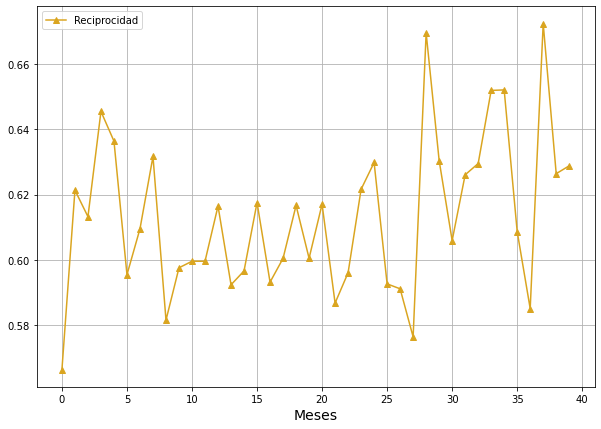

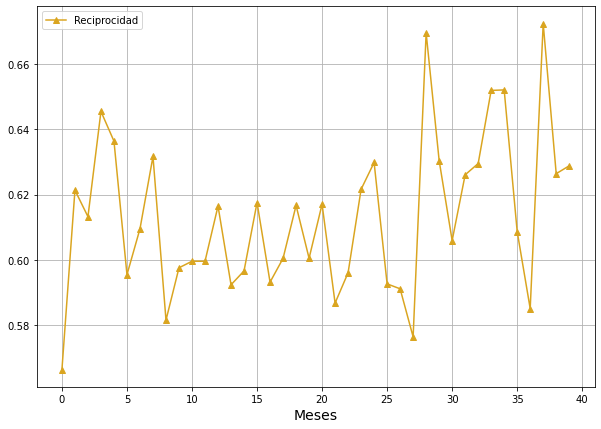

In [102]:
plt.figure(figsize = (10, 7))
#plt.plot(horas, meandegree, 'o', linestyle = '-', label = 'Grado medio')
#plt.plot(horas, num_nodes, '*', color = 'r', linestyle = '-', label = 'Nodos en la red')
#plt.plot(horas, num_edges, 'v', color = 'g', linestyle = '-', label = 'Conexiones en la red')
plt.plot(x_1, reciprocidad_materia, '^', color = 'goldenrod', linestyle = '-', label = 'Reciprocidad')
#plt.plot(horas, avg_clustering, 's', color = 'indigo', linestyle = '-', label = 'Clustering medio')
plt.xlabel('Meses', fontsize = 14)
plt.legend()
plt.grid()
plt.plot()

[]

[]

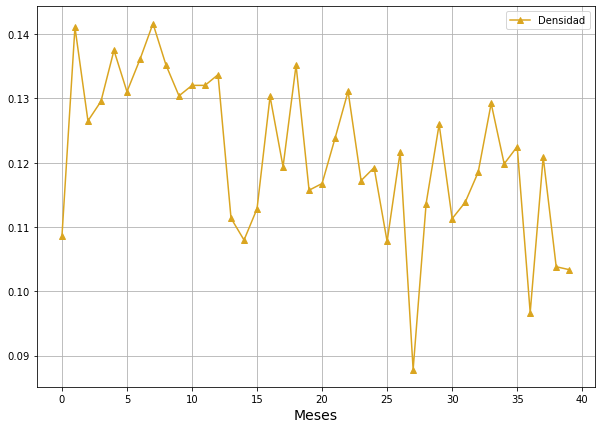

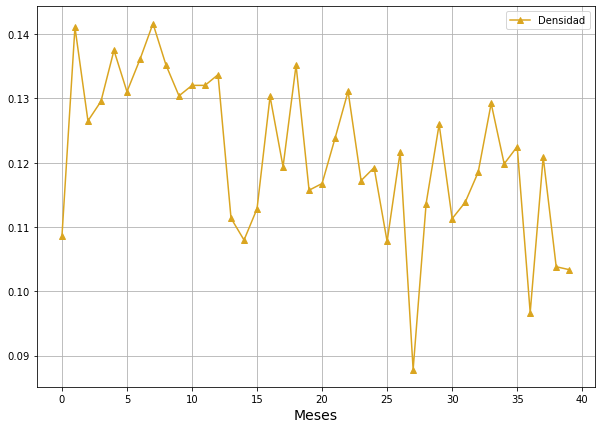

In [105]:
plt.figure(figsize = (10, 7))
#plt.plot(horas, meandegree, 'o', linestyle = '-', label = 'Grado medio')
#plt.plot(horas, num_nodes, '*', color = 'r', linestyle = '-', label = 'Nodos en la red')
#plt.plot(horas, num_edges, 'v', color = 'g', linestyle = '-', label = 'Conexiones en la red')
plt.plot(x_1, densidad_materia, '^', color = 'goldenrod', linestyle = '-', label = 'Densidad')
#plt.plot(horas, avg_clustering, 's', color = 'indigo', linestyle = '-', label = 'Clustering medio')
plt.xlabel('Meses', fontsize = 14)
plt.legend()
plt.grid()
plt.plot()

[]

[]

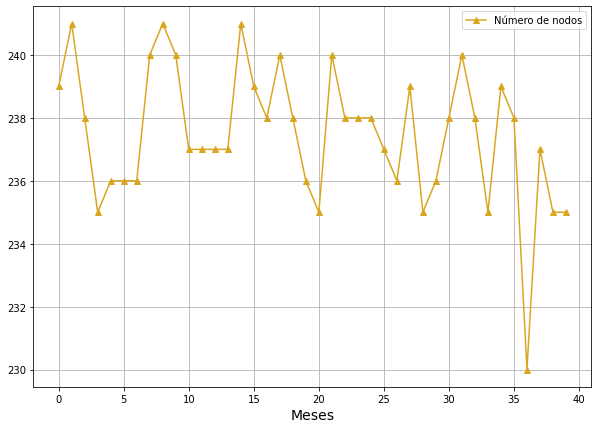

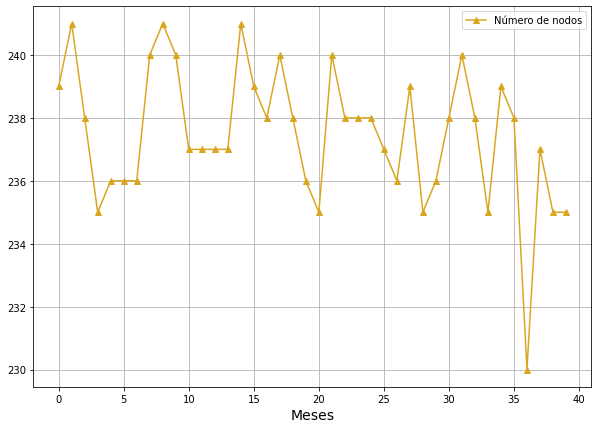

In [104]:
plt.figure(figsize = (10, 7))
#plt.plot(horas, meandegree, 'o', linestyle = '-', label = 'Grado medio')
#plt.plot(horas, num_nodes, '*', color = 'r', linestyle = '-', label = 'Nodos en la red')
#plt.plot(horas, num_edges, 'v', color = 'g', linestyle = '-', label = 'Conexiones en la red')
plt.plot(x_1, numero_nodos_materia, '^', color = 'goldenrod', linestyle = '-', label = 'Número de nodos')
#plt.plot(horas, avg_clustering, 's', color = 'indigo', linestyle = '-', label = 'Clustering medio')
plt.xlabel('Meses', fontsize = 14)
plt.legend()
plt.grid()
plt.plot()

# vehiculooo

In [106]:
r0_vehiculos = pd.read_csv('2018enerovehiculos.csv',sep=',',encoding='utf-8')
r1_vehiculos = pd.read_csv('2018febvehiculos.csv',sep=',',encoding='utf-8')
r2_vehiculos = pd.read_csv('2018marzovehiculos.csv',sep=',',encoding='utf-8')
r3_vehiculos = pd.read_csv('2018abrilvehiculos.csv',sep=',',encoding='utf-8')
r4_vehiculos = pd.read_csv('2018mayovehiculos.csv',sep=',',encoding='utf-8')
r5_vehiculos = pd.read_csv('2018juniovehiculos.csv',sep=',',encoding='utf-8')
r6_vehiculos = pd.read_csv('2018juliovehiculos.csv',sep=',',encoding='utf-8')
r7_vehiculos = pd.read_csv('2018agostovehiculos.csv',sep=',',encoding='utf-8')
r8_vehiculos = pd.read_csv('2018sepvehiculos.csv',sep=',',encoding='utf-8')
r9_vehiculos = pd.read_csv('2018octvehiculos.csv',sep=',',encoding='utf-8')
r10_vehiculos = pd.read_csv('2018nov11vehiculos.csv',sep=',',encoding='utf-8')
r11_vehiculos = pd.read_csv('2018dicvehiculos.csv',sep=',',encoding='utf-8')
r12_vehiculos=pd.read_csv('2019Enerovehiculos.csv',sep=',',encoding='utf-8')
r13_vehiculos = pd.read_csv('2019febrerovehiculos.csv',sep=',',encoding='utf-8')
r14_vehiculos = pd.read_csv('2019marzovehiculos.csv',sep=',',encoding='utf-8')
r15_vehiculos = pd.read_csv('2019abrilvehiculos.csv',sep=',',encoding='utf-8')
r16_vehiculos = pd.read_csv('2019mayovehiculos.csv',sep=',',encoding='utf-8')
r17_vehiculos = pd.read_csv('2019juniovehiculos.csv',sep=',',encoding='utf-8')
r18_vehiculos = pd.read_csv('2019juliovehiculos.csv',sep=',',encoding='utf-8')
r19_vehiculos = pd.read_csv('2019agostovehiculos.csv',sep=',',encoding='utf-8')
r20_vehiculos = pd.read_csv('2019sepvehiculos.csv',sep=',',encoding='utf-8')
r21_vehiculos = pd.read_csv('2019octubrevehiculos.csv',sep=',',encoding='utf-8')
r22_vehiculos = pd.read_csv('2019novvehiculos.csv',sep=',',encoding='utf-8')
r23_vehiculos = pd.read_csv('2019dicvehiculos.csv',sep=',',encoding='utf-8')
r24_vehiculos=pd.read_csv('2020enerovehiculos.csv',sep=',',encoding='utf-8')
r25_vehiculos = pd.read_csv('2020febrerovehiculos.csv',sep=',',encoding='utf-8')
r26_vehiculos = pd.read_csv('2020marzovehiculos.csv',sep=',',encoding='utf-8')
r27_vehiculos = pd.read_csv('2020abrilvehiculos.csv',sep=',',encoding='utf-8')
r28_vehiculos = pd.read_csv('2020mayovehiculos.csv',sep=',',encoding='utf-8')
r29_vehiculos = pd.read_csv('2020juniovehiculos.csv',sep=',',encoding='utf-8')
r30_vehiculos = pd.read_csv('2020juliovehiculos.csv',sep=',',encoding='utf-8')
r31_vehiculos = pd.read_csv('2020agostovehiculos.csv',sep=',',encoding='utf-8')
r32_vehiculos = pd.read_csv('2020septiembrevehiculos.csv',sep=',',encoding='utf-8')
r33_vehiculos = pd.read_csv('2020octubrevehiculos.csv',sep=',',encoding='utf-8')
r34_vehiculos = pd.read_csv('2020noviembrevehiculos.csv',sep=',',encoding='utf-8')
r35_vehiculos = pd.read_csv('2020diciembrevehiculos.csv',sep=',',encoding='utf-8')
r36_vehiculos=pd.read_csv('2021enerovehiculos.csv',sep=',',encoding='utf-8')
r37_vehiculos = pd.read_csv('2021febrerovehiculos.csv',sep=',',encoding='utf-8')
r38_vehiculos = pd.read_csv('2021marzovehiculos.csv',sep=',',encoding='utf-8')
r39_vehiculos = pd.read_csv('2021abrivehiculos.csv',sep=',',encoding='utf-8')

FileNotFoundError: [Errno 2] No such file or directory: '2019octubrevehiculos.csv'

FileNotFoundError: [Errno 2] No such file or directory: '2019octubrevehiculos.csv'

In [107]:
r0_vehiculos = pd.read_csv('2018enerovehiculos.csv',sep=',',encoding='utf-8')
r1_vehiculos = pd.read_csv('2018febvehiculos.csv',sep=',',encoding='utf-8')
r2_vehiculos = pd.read_csv('2018marzovehiculos.csv',sep=',',encoding='utf-8')
r3_vehiculos = pd.read_csv('2018abrilvehiculos.csv',sep=',',encoding='utf-8')
r4_vehiculos = pd.read_csv('2018mayovehiculos.csv',sep=',',encoding='utf-8')
r5_vehiculos = pd.read_csv('2018juniovehiculos.csv',sep=',',encoding='utf-8')
r6_vehiculos = pd.read_csv('2018juliovehiculos.csv',sep=',',encoding='utf-8')
r7_vehiculos = pd.read_csv('2018agostovehiculos.csv',sep=',',encoding='utf-8')
r8_vehiculos = pd.read_csv('2018sepvehiculos.csv',sep=',',encoding='utf-8')
r9_vehiculos = pd.read_csv('2018octvehiculos.csv',sep=',',encoding='utf-8')
r10_vehiculos = pd.read_csv('2018nov11vehiculos.csv',sep=',',encoding='utf-8')
r11_vehiculos = pd.read_csv('2018dicvehiculos.csv',sep=',',encoding='utf-8')
r12_vehiculos=pd.read_csv('2019Enerovehiculos.csv',sep=',',encoding='utf-8')
r13_vehiculos = pd.read_csv('2019febrerovehiculos.csv',sep=',',encoding='utf-8')
r14_vehiculos = pd.read_csv('2019marzovehiculos.csv',sep=',',encoding='utf-8')
r15_vehiculos = pd.read_csv('2019abrilvehiculos.csv',sep=',',encoding='utf-8')
r16_vehiculos = pd.read_csv('2019mayovehiculos.csv',sep=',',encoding='utf-8')
r17_vehiculos = pd.read_csv('2019juniovehiculos.csv',sep=',',encoding='utf-8')
r18_vehiculos = pd.read_csv('2019juliovehiculos.csv',sep=',',encoding='utf-8')
r19_vehiculos = pd.read_csv('2019agostovehiculos.csv',sep=',',encoding='utf-8')
r20_vehiculos = pd.read_csv('2019sepvehiculos.csv',sep=',',encoding='utf-8')
r21_vehiculos = pd.read_csv('2019octvehiculos.csv',sep=',',encoding='utf-8')

In [109]:
r22_vehiculos = pd.read_csv('2019novvehiculos.csv',sep=',',encoding='utf-8')
r23_vehiculos = pd.read_csv('2019dicvehiculos.csv',sep=',',encoding='utf-8')
r24_vehiculos=pd.read_csv('2020enerovehiculos.csv',sep=',',encoding='utf-8')
r25_vehiculos = pd.read_csv('2020febrerovehiculos.csv',sep=',',encoding='utf-8')
r26_vehiculos = pd.read_csv('2020marzovehiculos.csv',sep=',',encoding='utf-8')
r27_vehiculos = pd.read_csv('2020abrilvehiculos.csv',sep=',',encoding='utf-8')
r28_vehiculos = pd.read_csv('2020mayovehiculos.csv',sep=',',encoding='utf-8')
r29_vehiculos = pd.read_csv('2020juniovehiculos.csv',sep=',',encoding='utf-8')
r30_vehiculos = pd.read_csv('2020juliovehiculos.csv',sep=',',encoding='utf-8')
r31_vehiculos = pd.read_csv('2020agostovehiculos.csv',sep=',',encoding='utf-8')
r32_vehiculos = pd.read_csv('2020septiembrevehiculos.csv',sep=',',encoding='utf-8')
r33_vehiculos = pd.read_csv('2020octubrevehiculos.csv',sep=',',encoding='utf-8')
r34_vehiculos = pd.read_csv('2020noviembrevehiculos.csv',sep=',',encoding='utf-8')
r35_vehiculos = pd.read_csv('2020diciembrevehiculos.csv',sep=',',encoding='utf-8')
r36_vehiculos=pd.read_csv('2021enerovehiculos.csv',sep=',',encoding='utf-8')
r37_vehiculos = pd.read_csv('2021febvehiculos.csv',sep=',',encoding='utf-8')
r38_vehiculos = pd.read_csv('2021marzovehiculos.csv',sep=',',encoding='utf-8')
r39_vehiculos = pd.read_csv('2021abrilvehiculos.csv',sep=',',encoding='utf-8')

In [111]:
dataset_comodidades_vehiculos=[r0_vehiculos,r1_vehiculos,r2_vehiculos,r3_vehiculos,r4_vehiculos,r5_vehiculos,r6_vehiculos,r7_vehiculos,r8_vehiculos,r9_vehiculos,r10_vehiculos,r11_vehiculos,r12_vehiculos,r13_vehiculos,r14_vehiculos,r15_vehiculos,r16_vehiculos,r17_vehiculos,r18_vehiculos,r19_vehiculos,r20_vehiculos,r21_vehiculos,r22_vehiculos,r23_vehiculos,r24_vehiculos,r25_vehiculos,r26_vehiculos,r27_vehiculos,r28_vehiculos,r29_vehiculos,r30_vehiculos,r31_vehiculos,r32_vehiculos,r33_vehiculos,r34_vehiculos,r35_vehiculos,r36_vehiculos,r37_vehiculos,r38_vehiculos,r39_vehiculos]


In [112]:
dataset_comodidades_vehiculos=[quitar_worldp(i) for i in dataset_comodidades_vehiculos]
dataset_comodidades_vehiculos=[quitar_worldr(i) for i in dataset_comodidades_vehiculos]

In [113]:
grafos_vehiculos=[crear_grafo_di(i) for i in dataset_comodidades_vehiculos]

In [114]:
numero_nodos_vehiculos=[numero_nodos(i) for i in grafos_vehiculos]


In [115]:
reciprocidad_vehiculos=[reciprocity(i) for i in grafos_vehiculos] #vector de reciprocidad



densidad_vehiculos=[density(i) for i in grafos_vehiculos]

[]

[]

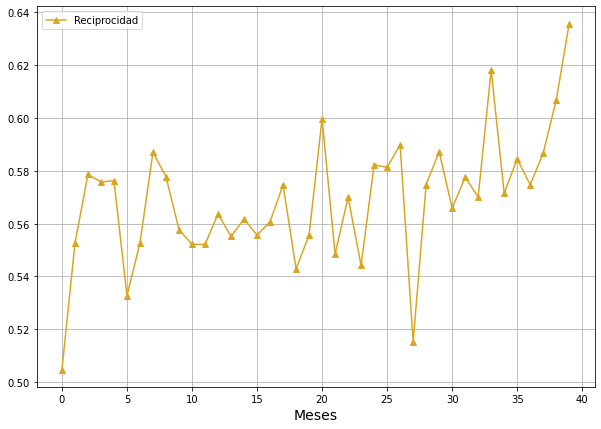

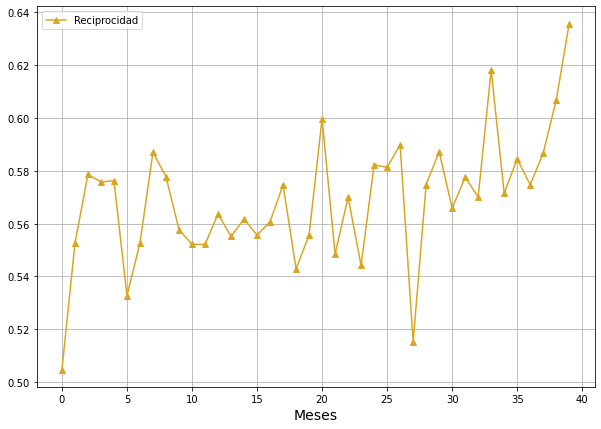

In [116]:
plt.figure(figsize = (10, 7))
#plt.plot(horas, meandegree, 'o', linestyle = '-', label = 'Grado medio')
#plt.plot(horas, num_nodes, '*', color = 'r', linestyle = '-', label = 'Nodos en la red')
#plt.plot(horas, num_edges, 'v', color = 'g', linestyle = '-', label = 'Conexiones en la red')
plt.plot(x_1, reciprocidad_vehiculos, '^', color = 'goldenrod', linestyle = '-', label = 'Reciprocidad')
#plt.plot(horas, avg_clustering, 's', color = 'indigo', linestyle = '-', label = 'Clustering medio')
plt.xlabel('Meses', fontsize = 14)
plt.legend()
plt.grid()
plt.plot()

[]

[]

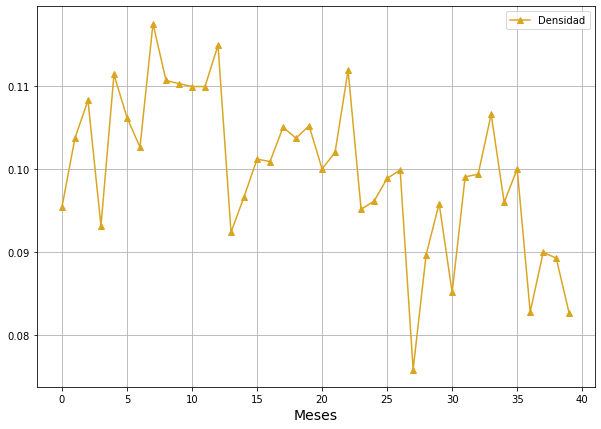

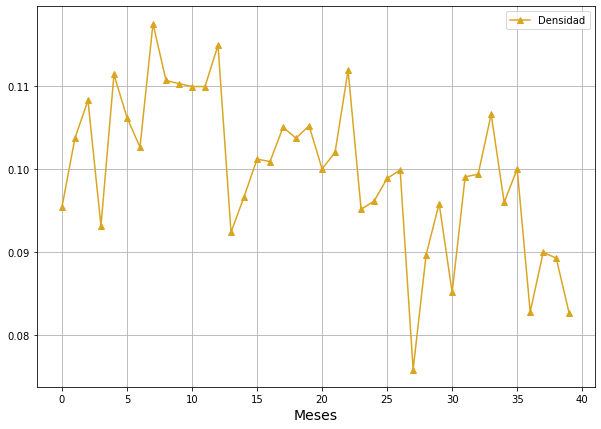

In [117]:
plt.figure(figsize = (10, 7))
#plt.plot(horas, meandegree, 'o', linestyle = '-', label = 'Grado medio')
#plt.plot(horas, num_nodes, '*', color = 'r', linestyle = '-', label = 'Nodos en la red')
#plt.plot(horas, num_edges, 'v', color = 'g', linestyle = '-', label = 'Conexiones en la red')
plt.plot(x_1, densidad_vehiculos, '^', color = 'goldenrod', linestyle = '-', label = 'Densidad')
#plt.plot(horas, avg_clustering, 's', color = 'indigo', linestyle = '-', label = 'Clustering medio')
plt.xlabel('Meses', fontsize = 14)
plt.legend()
plt.grid()
plt.plot()

[]

[]

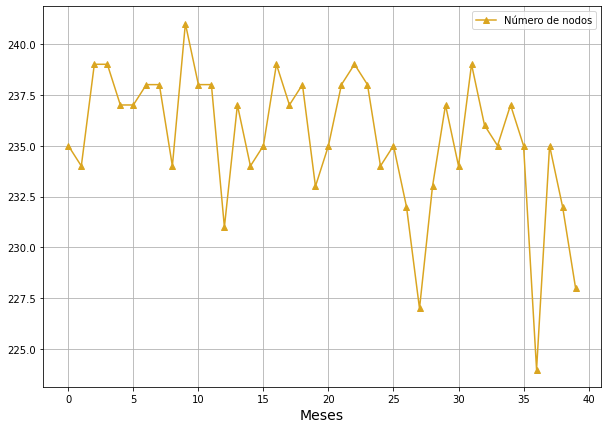

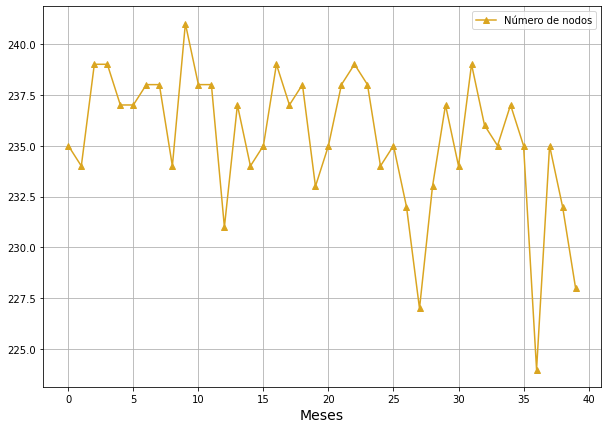

In [118]:
plt.figure(figsize = (10, 7))
#plt.plot(horas, meandegree, 'o', linestyle = '-', label = 'Grado medio')
#plt.plot(horas, num_nodes, '*', color = 'r', linestyle = '-', label = 'Nodos en la red')
#plt.plot(horas, num_edges, 'v', color = 'g', linestyle = '-', label = 'Conexiones en la red')
plt.plot(x_1, numero_nodos_vehiculos, '^', color = 'goldenrod', linestyle = '-', label = 'Número de nodos')
#plt.plot(horas, avg_clustering, 's', color = 'indigo', linestyle = '-', label = 'Clustering medio')
plt.xlabel('Meses', fontsize = 14)
plt.legend()
plt.grid()
plt.plot()